### 결측값 처리
#### MACR(Missing Completely at Random;완전 무작위 결측) : 결측값이 무작위로 발생한 경우
#### MAR(Missing at Random;무작위 결측): 다른 변수의 특성에 의해 해당 변수의 결측치가 체계적으로 발생한 경우
#### NMAR(Missing at Not Random;비무작위 결측): 결측값들이 해당 변수 자체의 특성을 갖고 있는 경우

#### 가장 간단한 결측값 처리 방법은 결측값이 심하게 많은 변수를 제거하거나 결측값이 포함된 행(observation)을 제외하고 데이터 분석을 하는 '표본 제거 방법(complete analysis)'을 사용
#### '평균 대치법(Mean Imputation)': 결측값을 제외한 온전한 값들의 평균을 구한 다음, 그 평균 값을 결측값들에 대치하는 것
#### 해당 변수와 다른 변수 사이의 관계성을 고려하여 결측값을 계산하면 보다 합리적으로 결측값 처리할 수 있다. 회귀식을 이용하여 결측값을 추정하는 '회귀 대치법(Regression Imputation)'이 그 방법이다.
#### 회귀 대치법으로 인한 변수의 분산을 과소 추정하는 문제를 해결하기 위해 인위적으로 회귀식에 확률 오차항을 추가하는 '확률적 회귀대치법(Stochastic Regression Imputation)'을 사용하여 변동성을 조정하기도 한다
#### 최근 단순 대치법들의 표본오차 과소 추정 문제를 해결하기 위해 많이 사용되는 방법이 '다중 대치법(Multiple Inputation)'이다. 단순대치를 여러번 수행하여 n개의 가상적 데이터를 생성하여 이들의 평균으로 결측값을 대치하는 방법으로 3단계가 있다.
#### -대치 단계(Imputation Step): 가능한 대치 값의 분포에서 추출된 서로 다른 값으로 결측치를 처리한 n개의 데이터셋 생성
#### -분석 단계(Analysis step): 생성된 각각의 데이터셋을 분석하여 모수의 추정치와 표준오차 계산
#### -결합 단계(Pooling Step): 계산된 각 데이터셋의 추정치와 표준오차를 결합하여 최종 결측 대치값 산출

In [1]:
# 필요한 패키지 설치
!pip install missingno
import missingno as msno
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
plt.rcParams['figure.dpi'] = 300

In [2]:
# 데이터 불러오기
# https://www.kaggle.com/datasets/sewonghwang/daily-bike-sharing
df = pd.read_csv("C:/Users/qorud/OneDrive/바탕 화면/Github/Data Analysis Method/bike_sharing_daily.csv")

# 데이터 샘플 확인
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331.0,654.0,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131.0,670.0,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,NaN,0.437273,0.248309,120.0,1229.0,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108.0,1454.0,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82.0,1518.0,1600


#### attemp 칼럼의 3번째 값이 결측값이 있는 것을 확인할 수 있다.

In [3]:
# 각 컬럼의 속성 및 결측값 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        714 non-null    float64
 10  atemp       707 non-null    float64
 11  hum         706 non-null    float64
 12  windspeed   718 non-null    float64
 13  casual      720 non-null    float64
 14  registered  720 non-null    float64
 15  cnt         731 non-null    int64  
dtypes: float64(6), int64(9), object(1)
memory usage: 91.5+ KB


#### 칼럼별로 non-null의 수가 다른 것으로 보아 결측값이 있는 것을 알 수 있다. 하지만 수를 나타내므돌 정확한 결측값이 얼마나 되는지 확인하기 어렵다

In [4]:
# 결측값 수만 확인
df.isnull().sum()

instant        0
dteday         0
season         0
yr             0
mnth           0
holiday        0
weekday        0
workingday     0
weathersit     0
temp          17
atemp         24
hum           25
windspeed     13
casual        11
registered    11
cnt            0
dtype: int64

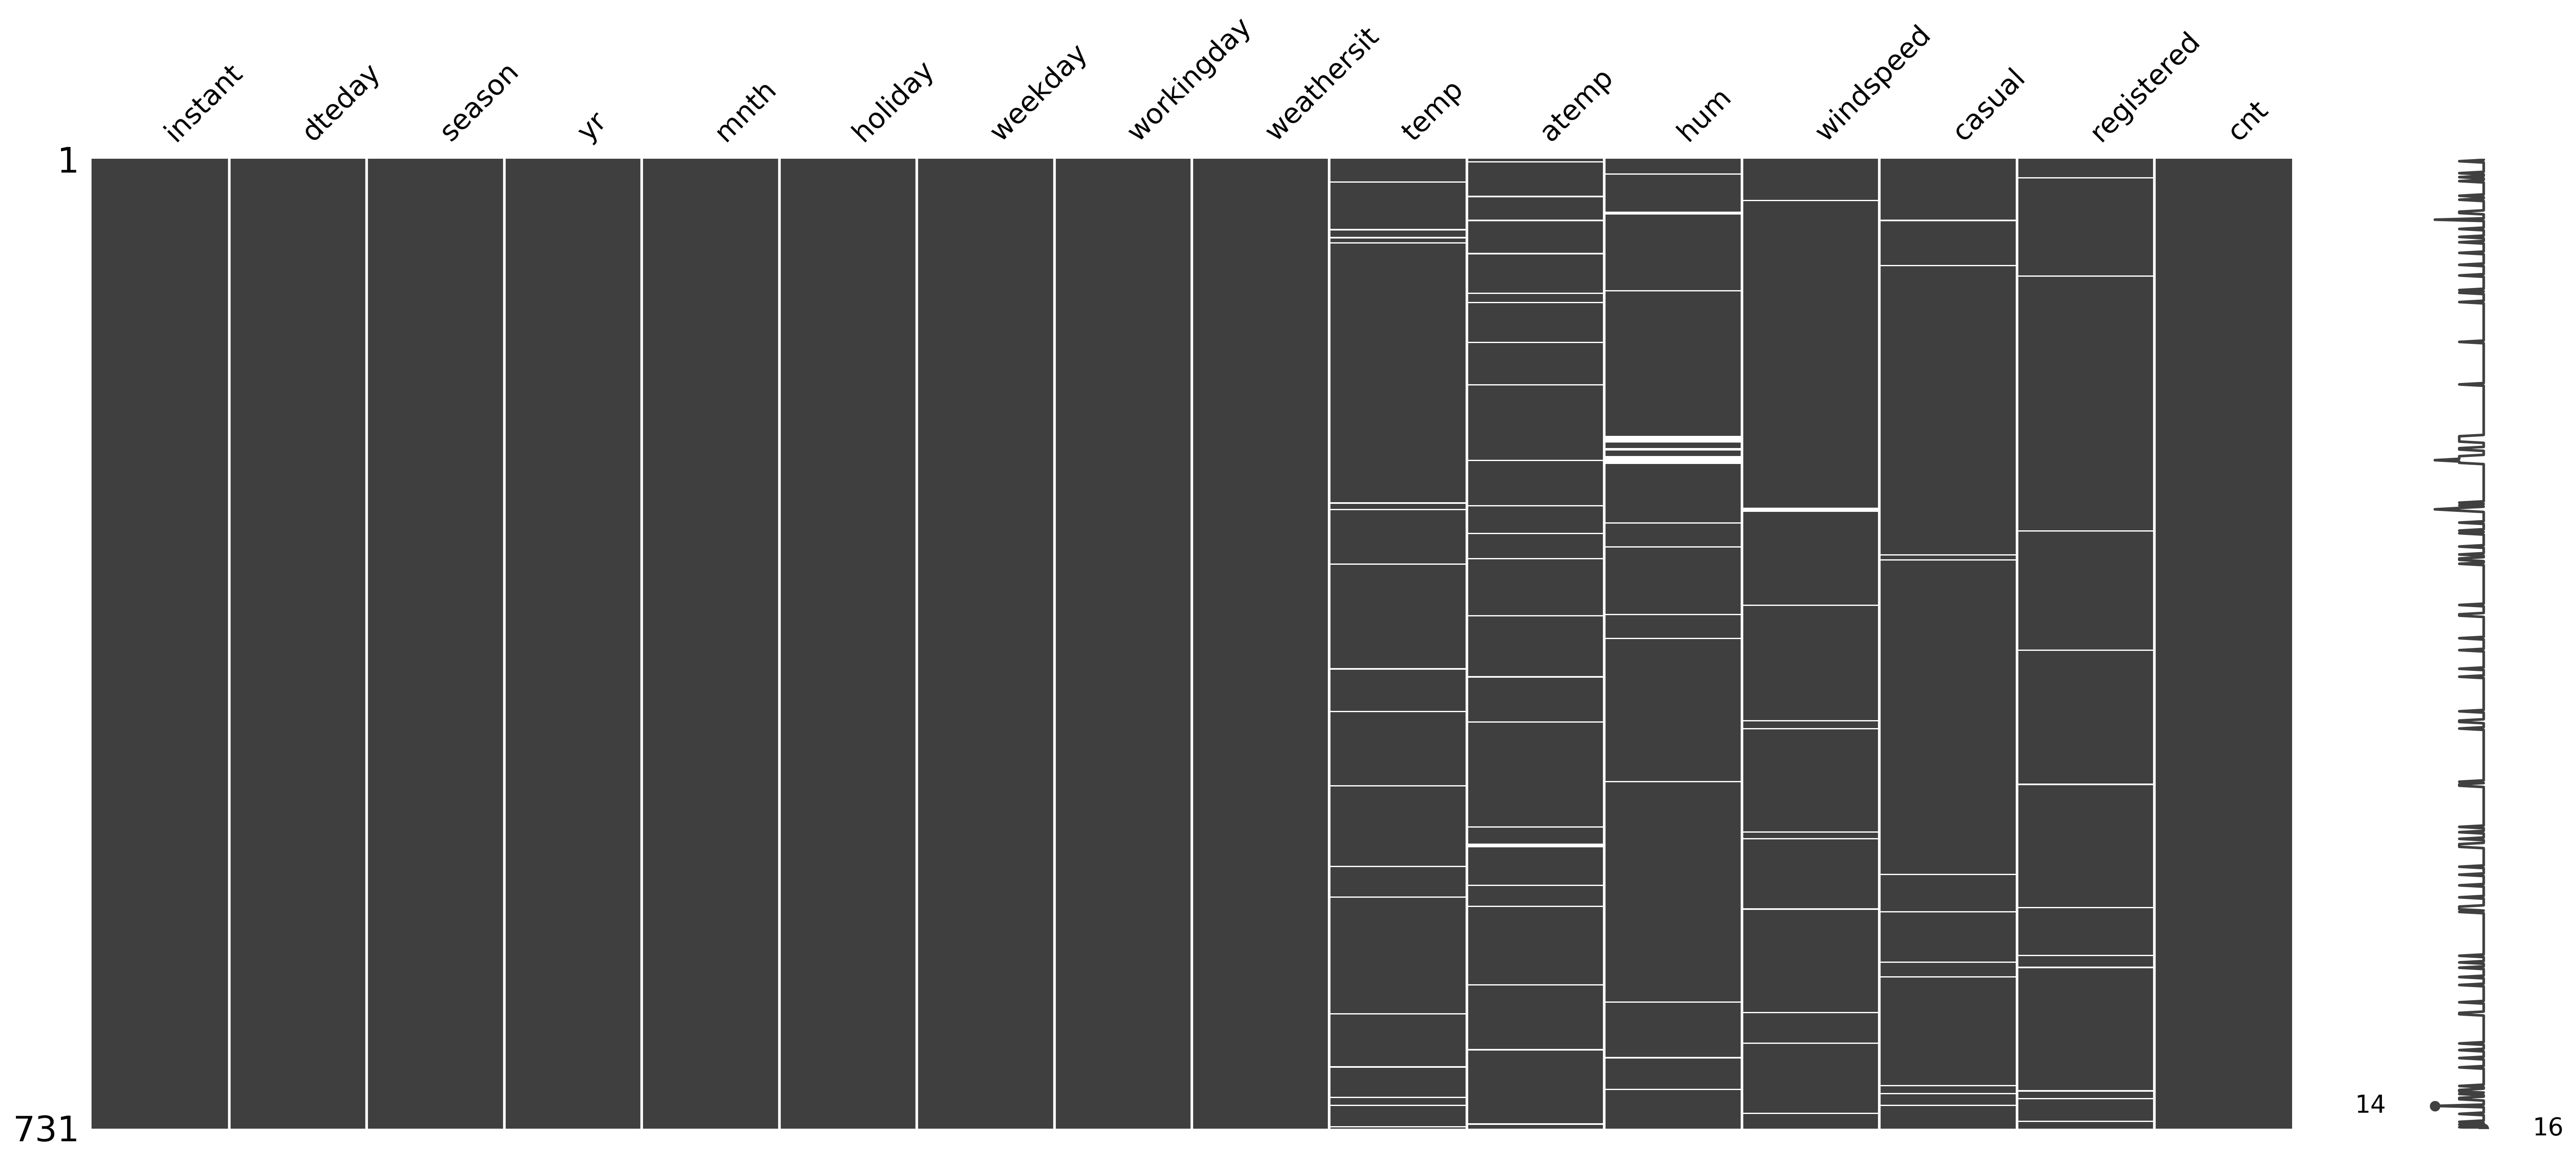

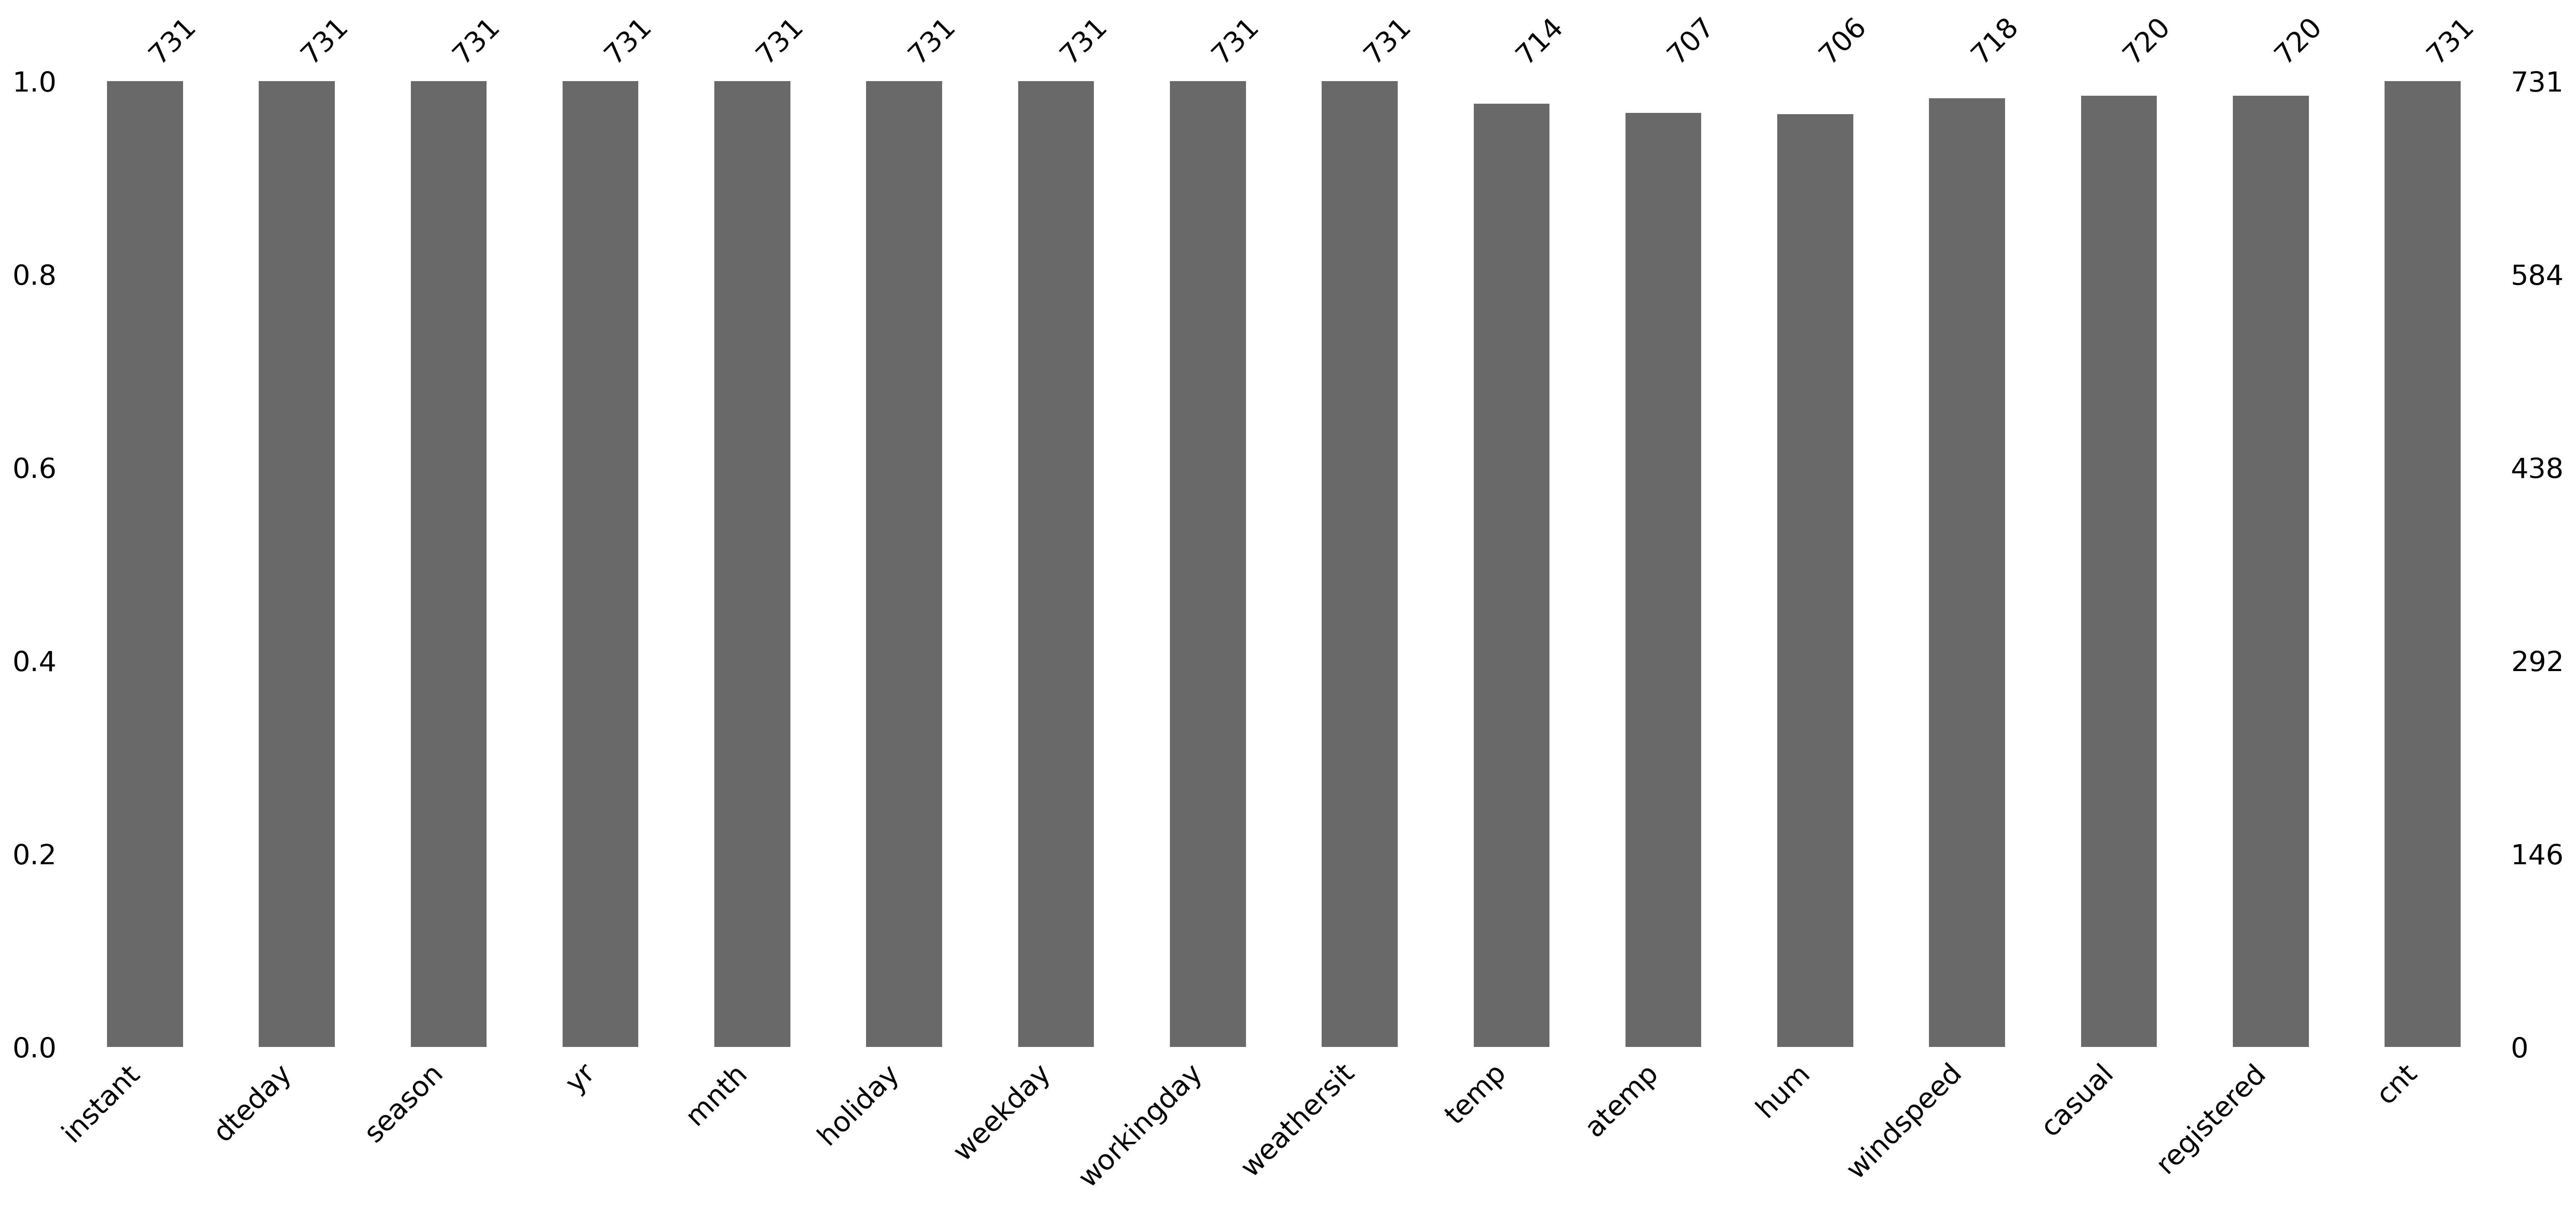

In [5]:
# 결측값 시각화 - 전체 컬럼의 결측값 시각화

# 결측값 영역 표시
msno.matrix(df)
plt.show()

# 결측값 막대 그래프
msno.bar(df)
plt.show()

#### hum 칼럼이 연속적으로 결측값을 많이 가지고 있는 것을 확인할 수 있다.

In [6]:
# 결측값이 아닌 빈 문자열이 있는지 확인

def is_emptystring(x):
    return x.eq('').any()
 
df.apply(lambda x:is_emptystring(x))

instant       False
dteday        False
season        False
yr            False
mnth          False
holiday       False
weekday       False
workingday    False
weathersit    False
temp          False
atemp         False
hum           False
windspeed     False
casual        False
registered    False
cnt           False
dtype: bool

#### 결측값으로 인식되지 않지만 실젯값이 빈 문자열인 값이 있는지 확인한다. 빈 문자열이을 체크하는 함수를 적용한 결과 모든 칼럼에는 빈 문자열 값이 없다.

In [7]:
# 결측값 표본 제거

# 모든 컬럼이 결측값인 행 제거
df_drop_all = df.dropna(how='all')

#  세개 이상의 컬럼이 결측값인 행 제거
df_drop_3 = df.dropna(thresh=3)

#  특정 컬럼(temp)이 결측값인 행 제거
df_drop_slt = df.dropna(subset=['temp'])

# 한 컬럼이라도 결측치가 있는 행 제거
df_drop_any = df.dropna(how='any')

df_drop_any.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
## 결측값 기본 대치 방법들

# 특정값(0)으로 대치 - 전체 컬럼
df_0_all = df.fillna(0)

# 특정값(0)으로 대치 - 컬럼 지정
df_0_slt = df.fillna({'temp':0})

# 평균값 대치 - 전체 컬럼
df_mean_all = df.fillna(df.mean())

# 평균값 대치 - 컬럼 지정
df_mean_slt = df.fillna({'temp':df['temp'].mean()})

# 중앙값 대치 - 전체 컬럼
df_median_all = df.fillna(df.median())

# 중앙값 대치 - 컬럼 지정
df_median_slt = df.fillna({'temp':df['temp'].median()})

# 최빈값 대치 - 전체 컬럼
df_mode_all = df.fillna(df.mode())

# 최빈값 대치 - 컬럼 지정
df_mode_slt = df.fillna({'temp':df['temp'].mode()})

# 최댓값 대치 - 전체 컬럼
df_max_all = df.fillna(df.max())

# 최댓값 대치 - 컬럼 지정
df_max_slt = df.fillna({'temp':df['temp'].max()})

# 최솟값 대치 - 전체 컬럼
df_min_all = df.fillna(df.min())

# 최솟값 대치 - 컬럼 지정
df_min_slt = df.fillna({'temp':df['temp'],'hum':df['hum'].min()})


df_min_slt.isnull().sum()

C:\Users\qorud\AppData\Local\Temp\ipykernel_22876\2778447213.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_mean_all = df.fillna(df.mean())
C:\Users\qorud\AppData\Local\Temp\ipykernel_22876\2778447213.py:16: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_median_all = df.fillna(df.median())


instant        0
dteday         0
season         0
yr             0
mnth           0
holiday        0
weekday        0
workingday     0
weathersit     0
temp          17
atemp         24
hum            0
windspeed     13
casual        11
registered    11
cnt            0
dtype: int64

In [9]:
# 결측값 보간 대치 방법들

# 전 시점 값으로 대치 - 컬럼 지정
df1 = df.copy()
df1['temp'].fillna(method ='pad' ,inplace=True)

# 뒤 시점 값으로 대치 - 전체 컬럼
df.fillna(method ='bfill')

# 뒤 시점 값으로 대치 - 결측값 연속 한번만 대치
df.fillna(method='bfill', limit=1)

# 보간법 함수 사용하여 대치 - 단순 순서 방식
ts_intp_linear = df.interpolate(method='values')

# 보간법 함수 사용하여 대치 - 시점 인덱스 사용

    # dteday 컬럼 시계열 객체 변환
df['dteday'] = pd.to_datetime(df['dteday'])

    # dteday 컬럼 인덱스 변경
df_i = df.set_index('dteday') 

    # 시점에 따른 보간법 적용
df_time = df_i.interpolate(method='time')

df_time.isnull().sum()

instant       0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [10]:
#다중 대치(MICE) 

# dteday 컬럼 제거
df_dp = df.drop(['dteday'],axis=1)

# 다중 대치 알고리즘 설정
imputer=IterativeImputer(imputation_order='ascending',
                         max_iter=10,random_state=42,
                         n_nearest_features=5)

# 다중 대치 적용
df_imputed = imputer.fit_transform(df_dp)

# 판다스 변환 및 컬럼 설정
df_imputed = pd.DataFrame(df_imputed)
df_imputed.columns = ['instant','season','yr','mnth','holiday'
                    ,'weekday','workingday','weathersit','temp'
                    ,'atemp','hum','windspeed','casual','registered','cnt']

df_imputed.isnull().sum()

C:\Users\qorud\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


instant       0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64